In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical # convert to one-hot-encoding

# build CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# data preparation

In [36]:
train = pd.read_csv('data/train.csv')
X_test = pd.read_csv('data/test.csv')

y = train['label']
X_train = train.drop('label', axis=1)
del train # free some space

datasets = [X_train, X_test]

data inspection : counts for the 10 digits and check for missing values

In [37]:
#sns.countplot(y)
print(y.value_counts())
print(X_train.isna().any().describe())
print(X_test.isna().any().describe())

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64
count       784
unique        1
top       False
freq        784
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


We have similar counts for every digit.
No missing values in both datasets.

# handle data

In [38]:
# Normalization : faster gradient descent convergence with values between 0 and 1
X_train/=255
X_test/=255

# reshape data into a 28*28*1 matrix,
# which correspond to a 28*28 pixel with 1 color canal
# 1 color canal beacause we have grey-scale images
# if we have RGB images, then we use 3 canals
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

y = to_categorical(y, num_classes=10)

inputs vizualizer

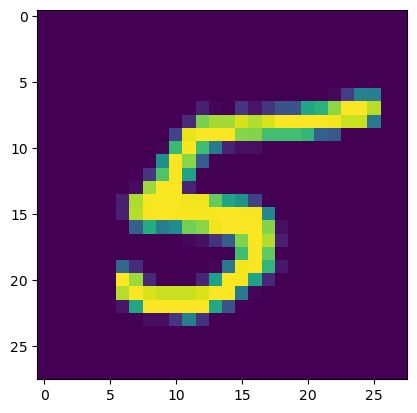

In [39]:
import random

image = X_train[random.randint(0,1000)]
plt.imshow(image[:,:,0])

## CNN  

In [40]:
# CNN Architecture

model = Sequential()

ConvLayer32 = Conv2D(
    filters=32,
    kernel_size=(5,5),
    padding="Same",
    activation='relu'
)

ConvLayer64 = Conv2D(
    filters=64,
    kernel_size=(3,3),
    padding="Same",
    activation='relu'
)

PoolLayer1 = MaxPool2D(pool_size=(2,2))
PoolLayer2 = MaxPool2D(pool_size=(2,2), strides=(2,2))

# Convolution/Pooling
model.add(ConvLayer32)
model.add(ConvLayer32)
model.add(PoolLayer1)
model.add(Dropout(rate=0.25))

model.add(ConvLayer64)
model.add(ConvLayer64)
model.add(PoolLayer2)
model.add(Dropout(rate=0.25))

# Fully Connected
model.add(Flatten()) # convert the 2D matrix into a 1D vector
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [41]:
# Choose an optimizer and compile the model
# optimizer = algorithm that iteratively improve the CNN parameters

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08) # default params

model.compile(
    optimizer = optimizer ,
    loss = "categorical_crossentropy",
    metrics=["accuracy"])



In [42]:
# train and predict

fitted_model = model.fit(X_train, y, epochs=25, batch_size=86)
outputs = model.predict(X_test)

Epoch 1/25
489/489 [==============================] - 14s 29ms/step - loss: 0.2525 - accuracy: 0.9193
Epoch 2/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 3/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0641 - accuracy: 0.9802
Epoch 4/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 5/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 6/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0418 - accuracy: 0.9873
Epoch 7/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 8/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 9/25
489/489 [==============================] - 14s 29ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 10/25
489/489 [==============================] - 14s 29ms/step - loss: 0.033

In [43]:
# save the result

prediction = []

for output in outputs:
    max = 0
    predicted_digit = 0
    for i, digit_proba in enumerate(output):
        if digit_proba>max:
            max = digit_proba
            predicted_digit = i
    
    prediction.append(predicted_digit)
       
print(prediction[:10])
       
pred_df = pd.DataFrame(prediction,
    index=np.arange(1,len(prediction)+1),
    columns=['Label'],
)

pred_df.index.name = 'ImageId'
pred_df.to_csv('results/prediction.csv')

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]


In [44]:
#save the result
import pickle
pickle.dump(model, open("results/digit_recognizer.pkl", "wb"))
model.his
#how to load and use the model :
#pickled_model = pickle.load(open('model.pkl', 'rb'))
#pickled_model.predict(X)

AttributeError: 'Sequential' object has no attribute 'his'

{'loss': [0.26127564907073975, 0.08264196664094925, 0.06340530514717102, 0.05315820872783661, 0.047112997621297836, 0.042008694261312485, 0.03958073630928993, 0.035948265343904495, 0.03564168140292168, 0.03372427076101303, 0.033103279769420624, 0.029792344197630882, 0.03160502761602402, 0.029340285807847977, 0.030048221349716187, 0.031117446720600128, 0.03030017390847206, 0.030382022261619568, 0.031036842614412308, 0.02922184020280838, 0.028226012364029884, 0.028139349073171616, 0.03043907880783081, 0.031072013080120087, 0.028321370482444763, 0.030330277979373932, 0.03063136525452137, 0.02912267856299877, 0.03229599446058273, 0.030103227123618126, 0.028171662241220474, 0.029889514669775963, 0.031492844223976135, 0.028499284759163857, 0.030158115550875664, 0.031273145228624344, 0.03169863298535347, 0.03155171871185303, 0.029723312705755234, 0.030812546610832214, 0.03198615461587906, 0.03141093626618385, 0.03240920230746269, 0.02991676889359951, 0.029618792235851288, 0.029860738664865494

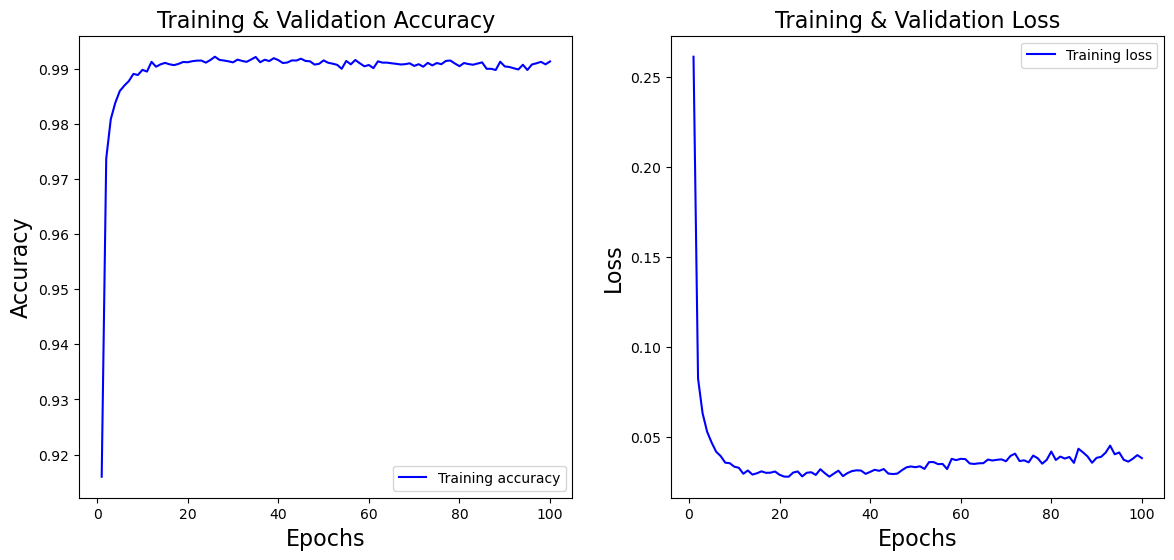

In [ ]:
print(fitted_model.history)

history = fitted_model.history

loss_values = history['loss']
accuracy = history['accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

best_epoch_acc = accuracy.index(np.max(accuracy))
best_epoch_loss = loss_values.index(np.min(loss_values))

print('accuracy inflection point : ', best_epoch_acc)
print('loss inflection point :', best_epoch_loss)